In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from net import Net, Net2, Net3
from helper_evaluation import set_all_seeds, set_deterministic, compute_accuracy
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR


In [2]:
DATASET_PATH = "NVFlare/examples/hello-world/ml-to-fl/pt/code/data"
# (optional) We change to use GPU to speed things up.
# if you want to use CPU, change DEVICE="cpu"
# DEVICE = "cuda:0"
DEVICE = "cpu"
RANDOM_SEED = 42

In [3]:
set_all_seeds(RANDOM_SEED)
set_deterministic()

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

if not os.path.exists(os.path.join(DATASET_PATH, 'cifar-10-batches-py')):
    download = True
else:
    download = False

# Add data augmentation
# transform_train = transforms.Compose([
# transforms.RandomHorizontalFlip(),
# transforms.RandomCrop(32, padding=4),
# transforms.RandomRotation(15),
# transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
# transforms.ToTensor(),
# transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
# ])

# transform_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
# ])

batch_size = 4
epochs = 100

trainset = torchvision.datasets.CIFAR10(root=DATASET_PATH, train=True, download=download, transform=transform)
trainset, _ = torch.utils.data.random_split(trainset, [5000, len(trainset) - 5000])  # Use a subset of 5000 images for training
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

validset = torchvision.datasets.CIFAR10(root=DATASET_PATH, train=False, download=download, transform=transform)
validset, _ = torch.utils.data.random_split(validset, [1000, len(validset) - 1000])  # Use a subset of 1000 images for validation
validloader = torch.utils.data.DataLoader(validset, batch_size=batch_size, shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=DATASET_PATH, train=False, download=download, transform=transform)
testset, _ = torch.utils.data.random_split(testset, [1000, len(testset) - 1000])  # Use a subset of 1000 images for testing
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
# testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# # Split training set into training and validation sets
# train_size = int(0.8 * len(trainset))
# val_size = len(trainset) - train_size
# train_subset, val_subset = torch.utils.data.random_split(trainset, [train_size, val_size])

# trainloader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=2)
# validloader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=2)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

net = Net3()

criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.AdamW(net.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=200)

# (optional) use GPU to speed things up
net.to(DEVICE)


minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=net,
    num_epochs=epochs,
    train_loader=trainloader,
    valid_loader=validloader,
    test_loader=testloader,
    optimizer=optimizer,
    criterion=criterion,
    device=DEVICE,
    input_model=None,
    summary_writer=None,
    scheduler=scheduler
)


100%|██████████| 170498071/170498071 [05:15<00:00, 541160.62it/s] 


Extracting NVFlare/examples/hello-world/ml-to-fl/pt/code/data/cifar-10-python.tar.gz to NVFlare/examples/hello-world/ml-to-fl/pt/code/data
Files already downloaded and verified
Files already downloaded and verified
Epoch: 001/100 | Train: 25.76% | Validation: 24.90%
Time elapsed: 0.44 min
Epoch: 002/100 | Train: 32.68% | Validation: 32.30%
Time elapsed: 0.92 min
Epoch: 003/100 | Train: 34.22% | Validation: 32.40%
Time elapsed: 1.39 min
Epoch: 004/100 | Train: 43.40% | Validation: 39.50%
Time elapsed: 1.84 min
Epoch: 005/100 | Train: 41.90% | Validation: 37.60%
Time elapsed: 2.26 min
Epoch: 006/100 | Train: 46.02% | Validation: 40.40%
Time elapsed: 2.67 min
Epoch: 007/100 | Train: 50.76% | Validation: 46.30%
Time elapsed: 3.08 min
Epoch: 008/100 | Train: 53.66% | Validation: 46.90%
Time elapsed: 3.48 min
Epoch: 009/100 | Train: 53.36% | Validation: 44.20%
Time elapsed: 3.89 min
Epoch: 010/100 | Train: 58.36% | Validation: 51.60%
Time elapsed: 4.29 min
Epoch: 011/100 | Train: 63.56% | Va

In [8]:
print(minibatch_loss_list)

[2.3475120067596436, 2.3927526473999023, 2.57633376121521, 2.4777159690856934, 2.2827610969543457, 2.691100835800171, 3.1183395385742188, 2.2824740409851074, 2.8357882499694824, 2.235975503921509, 3.2125244140625, 1.8030211925506592, 3.254981279373169, 2.3679237365722656, 2.721212863922119, 2.3740592002868652, 3.000974655151367, 2.4543838500976562, 2.50679349899292, 3.092466354370117, 2.9721858501434326, 2.8190927505493164, 2.3948001861572266, 2.909214496612549, 2.600627899169922, 3.0049166679382324, 2.5568060874938965, 2.6218481063842773, 2.64699649810791, 2.864906072616577, 2.8202924728393555, 2.0173230171203613, 2.340778350830078, 2.630096435546875, 2.873258590698242, 2.404076337814331, 2.2565317153930664, 2.701615333557129, 2.249600648880005, 2.0018973350524902, 2.1719024181365967, 2.809995174407959, 2.8187978267669678, 2.6862831115722656, 3.0220048427581787, 2.97265625, 1.9013416767120361, 2.283390998840332, 2.2890355587005615, 2.6464953422546387, 2.0482170581817627, 2.20540499687

Saving results...


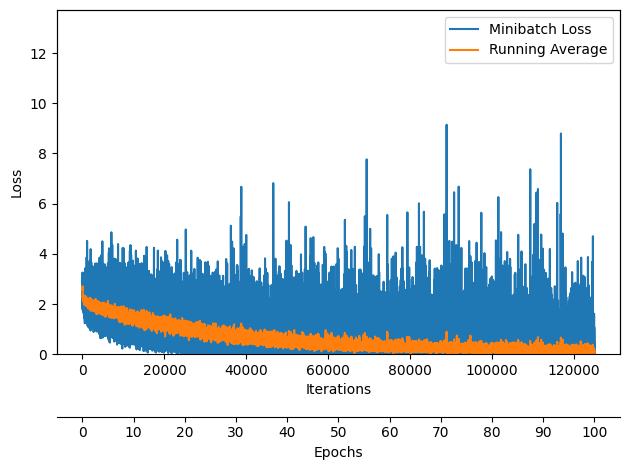

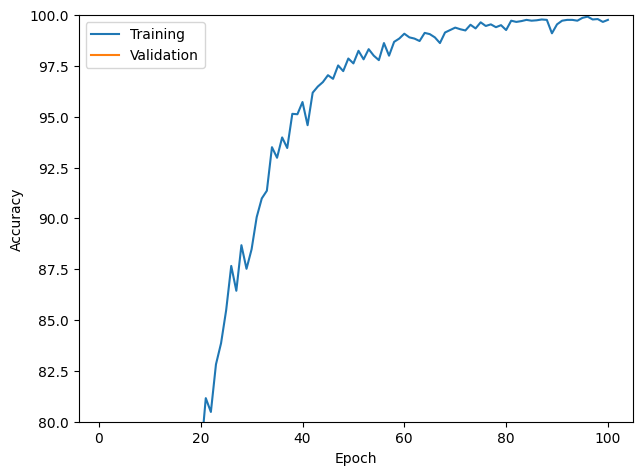

Finished Training


In [5]:
results_dir = "./results"
print("Saving results...")
os.makedirs(results_dir, exist_ok=True)

plot_training_loss(minibatch_loss_list, epochs, len(trainloader), results_dir,
                   averaging_iterations=20)
plt.show()
plot_accuracy(train_acc_list, valid_acc_list, results_dir)
plt.ylim([80, 100])
plt.show()
print("Finished Training")

In [3]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = self._make_layer(3, 32)
        self.layer2 = self._make_layer(32, 64)
        self.layer3 = self._make_layer(64, 128)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)
        self.batch_norm1 = nn.BatchNorm1d(512)

    def _make_layer(self, in_channels, out_channels):
        layer = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        return layer

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = ConvNet()


In [17]:
import torch.nn.functional as F
class Net2Improved(nn.Module):
    def __init__(self, num_filters=32, dropout_conv=0, dropout_dense=0.5, img_rows=32, img_cols=32, channels=3, num_classes=10):
        super(Net2Improved, self).__init__()
        self.conv1 = nn.Conv2d(channels, num_filters, kernel_size=3, padding='same')
        self.bn1 = nn.BatchNorm2d(num_filters)
        self.conv2 = nn.Conv2d(num_filters, num_filters, kernel_size=3, padding='same')
        self.bn2 = nn.BatchNorm2d(num_filters)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout_conv = nn.Dropout2d(dropout_conv)
        
        self.conv3 = nn.Conv2d(num_filters, 2*num_filters, kernel_size=3, padding='same')
        self.bn3 = nn.BatchNorm2d(2*num_filters)
        self.conv4 = nn.Conv2d(2*num_filters, 2*num_filters, kernel_size=3, padding='same')
        self.bn4 = nn.BatchNorm2d(2*num_filters)
        self.pool2 = nn.MaxPool2d(2, 2)
        
        self.conv5 = nn.Conv2d(2*num_filters, 4*num_filters, kernel_size=3, padding='same')
        self.bn5 = nn.BatchNorm2d(4*num_filters)
        self.conv6 = nn.Conv2d(4*num_filters, 4*num_filters, kernel_size=3, padding='same')
        self.bn6 = nn.BatchNorm2d(4*num_filters)
        self.pool3 = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(4*num_filters * (img_rows // 8) * (img_cols // 8), 512)
        self.bn7 = nn.BatchNorm1d(512)
        self.dropout_dense = nn.Dropout(dropout_dense)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = self.dropout_conv(x)
        
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = self.dropout_conv(x)
        
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.pool3(x)
        x = self.dropout_conv(x)
        
        x = torch.flatten(x, 1)
        x = F.relu(self.bn7(self.fc1(x)))
        x = self.dropout_dense(x)
        x = self.fc2(x)
        return x

In [18]:

set_all_seeds(RANDOM_SEED)
set_deterministic()

# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

if not os.path.exists(os.path.join(DATASET_PATH, 'cifar-10-batches-py')):
    download = True
else:
    download = False

# Add data augmentation
# Load CIFAR-10 dataset
# transform_train = transforms.Compose([
#     transforms.RandomRotation(15),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomResizedCrop(32, scale=(0.9, 1.1)),
#     transforms.ToTensor(),
#     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
# ])

# transform_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
# ])

# batch_size = 4
# epochs = 50

# trainset = torchvision.datasets.CIFAR10(root=DATASET_PATH, train=True, download=download, transform=transform_train)
# trainset, _ = torch.utils.data.random_split(trainset, [5000, len(trainset) - 5000])
# testset = torchvision.datasets.CIFAR10(root=DATASET_PATH, train=False, download=download, transform=transform_test)
# testset, _ = torch.utils.data.random_split(testset, [1000, len(testset) - 1000])  # Use a subset of 1000 images for testing


# # # Split training set into training and validation sets
# train_size = int(0.8 * len(trainset))
# val_size = len(trainset) - train_size
# train_subset, val_subset = torch.utils.data.random_split(trainset, [train_size, val_size])

# trainloader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=2)
# validloader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=2)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Parameters
img_rows, img_cols, channels = 32, 32, 3
num_classes = 10
batch_size = 64
validation_split = 0.1

# Data augmentation and normalization for training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(img_rows, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Just normalization for validation and test
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=download, transform=transform_train)

# Split the dataset into training and validation sets
train_size = int((1 - validation_split) * len(trainset))
valid_size = len(trainset) - train_size
trainset, validset = torch.utils.data.random_split(trainset, [train_size, valid_size])

# Apply the test transforms to the validation set
validset.dataset.transform = transform_test

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
validloader = torch.utils.data.DataLoader(validset, batch_size=batch_size, shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=DATASET_PATH, train=False,
                                       download=download, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


net = Net2Improved(num_filters=32, dropout_conv=0, dropout_dense=0.5, img_rows=32, img_cols=32, channels=3, num_classes=10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)
scheduler = CosineAnnealingLR(optimizer, T_max=200)

# (optional) use GPU to speed things up
net.to(DEVICE)


minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=net,
    num_epochs=epochs,
    train_loader=trainloader,
    valid_loader=validloader,
    test_loader=testloader,
    optimizer=optimizer,
    criterion=criterion,
    device=DEVICE,
    input_model=None,
    summary_writer=None,
    scheduler=scheduler
)


Starting training...
Adding train accuracy:  tensor(28.1500)
Adding validation accuracy:  tensor(29.)
Epoch: 001/050 | Train: 28.15% | Validation: 29.00%
Time elapsed: 0.58 min
Adding train accuracy:  tensor(39.4000)
Adding validation accuracy:  tensor(39.5000)
Epoch: 002/050 | Train: 39.40% | Validation: 39.50%
Time elapsed: 1.14 min
Adding train accuracy:  tensor(39.2250)
Adding validation accuracy:  tensor(39.5000)
Epoch: 003/050 | Train: 39.22% | Validation: 39.50%
Time elapsed: 1.71 min
Adding train accuracy:  tensor(41.0500)
Adding validation accuracy:  tensor(40.1000)
Epoch: 004/050 | Train: 41.05% | Validation: 40.10%
Time elapsed: 2.28 min
Adding train accuracy:  tensor(45.2750)
Adding validation accuracy:  tensor(44.3000)
Epoch: 005/050 | Train: 45.28% | Validation: 44.30%
Time elapsed: 2.85 min
Adding train accuracy:  tensor(48.7250)
Adding validation accuracy:  tensor(49.3000)
Epoch: 006/050 | Train: 48.72% | Validation: 49.30%
Time elapsed: 3.42 min
Adding train accuracy: 

Saving results...


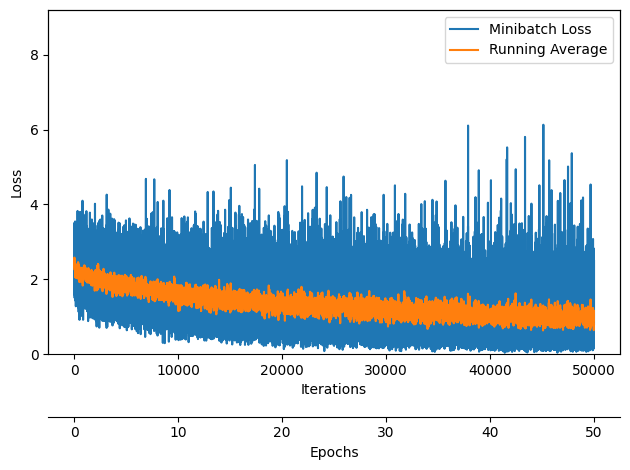

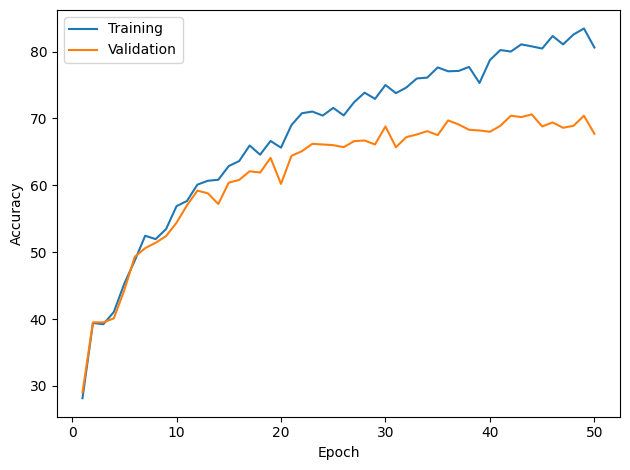

Finished Training


In [19]:
results_dir = None
print("Saving results...")
#os.makedirs(results_dir, exist_ok=True)

plot_training_loss(minibatch_loss_list, epochs, len(trainloader), results_dir,
                   averaging_iterations=20)
plt.show()
plot_accuracy(train_acc_list, valid_acc_list, results_dir)
plt.show()
print("Finished Training")

In [8]:
print(train_acc_list)
print(valid_acc_list)

[8.77500057220459, 9.09999942779541, 9.274999618530273, 9.149999618530273, 8.425000190734863, 9.300000190734863, 9.375, 9.09999942779541, 9.09999942779541, 9.324999809265137, 9.449999809265137, 9.024999618530273, 9.0, 7.850000381469727, 9.125, 9.25, 9.125, 8.824999809265137, 9.625, 8.949999809265137, 9.09999942779541, 9.25, 9.899999618530273, 9.22499942779541, 9.274999618530273, 9.125, 8.875, 9.52500057220459, 9.324999809265137, 9.800000190734863, 9.074999809265137, 8.15000057220459, 9.024999618530273, 9.09999942779541, 10.300000190734863, 9.09999942779541, 8.324999809265137, 8.824999809265137, 8.90000057220459, 7.949999809265137, 8.90000057220459, 9.675000190734863, 8.5, 9.675000190734863, 9.899999618530273, 8.800000190734863, 8.850000381469727, 9.324999809265137, 9.574999809265137, 8.800000190734863]
[8.100000381469727, 7.800000190734863, 10.300000190734863, 9.600000381469727, 8.399999618530273, 9.199999809265137, 9.600000381469727, 7.90000057220459, 8.699999809265137, 7.699999809265